In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import time
import os
from scipy.stats import norm
from scipy.optimize import curve_fit
import math

In [2]:
def initialize_matrix(n):
    M_n = np.arange(n*n).reshape((n, n))
    for i in range(0,n):
        for j in range(0,n): 
            M_n [i][j] =  np.random.randint(2)

    return M_n

In [3]:
def Evol_system(M_n):
    Vecinos = np.arange(8).reshape((1, 8))
    N = M_n

    for i in range(1, M_n.shape[0] - 1):
        for j in range(1, M_n.shape[0] - 1): 
            N[i][j] =  M_n[i][j]
  
            Vecinos = np.array([M_n[i-1][j-1], M_n[i-1][j], M_n[i-1][j+1], M_n[i][j-1], M_n[i][j+1], M_n[i+1][j-1], M_n[i+1][j], M_n[i+1][j+1]])
            k = np.count_nonzero(Vecinos==1)
      
            if M_n[i][j] == 0:
                if k==3:
                    N[i][j] = 1
                else:
                    N [i][j] = 0

            else:
                if k==2 or k==3:
                    N[i][j] = 1
                else:
                    N[i][j] = 0
      
        M_n = N

        return M_n

In [4]:
for h in range(1, 13):
    n = h * 5
    filename = "time_n=" + str(n) + ".txt"
    archivo = open(filename, "a")

    for p in range(0,50):
        M_n = initialize_matrix(h*5)
        k = [np.count_nonzero(M_n==1)]

        for i in range(0,9):
            M_n = Evol_system(M_n)
            k.append(np.count_nonzero(M_n == 1))

        tiempo_inicial=time.time()

        while(1):
            Evol_system(M_n)

            k[:-1] = k[1:]
            k[-1] = np.count_nonzero(M_n==1) 
      
      # condiciones de estabilidad por periodicidad
            condition_p1 = sum(k) == k[-1] * 10
            condition_p2 = sum([k[i] for i in range(0, len(k), 2)]) == k[-2] * 5 and sum([k[i] for i in range(1, len(k), 2)]) == k[-1] * 5 
            condition_p3 = sum([k[i] for i in range(0, len(k), 3)]) == k[-1] * 4 and sum([k[i] for i in range(1, len(k), 3)]) == k[-3] * 3 and sum([k[i] for i in range(2, len(k), 3)]) == k[-2] * 3  
            condition_p4 = sum([k[i] for i in range(0, len(k), 4)]) == k[-2] * 3 and sum([k[i] for i in range(1, len(k), 4)]) == k[-1] * 3 and sum([k[i] for i in range(2, len(k), 4)]) == k[-4] * 2 and sum([k[i] for i in range(2, len(k), 4)]) == k[-3] * 2  
            condition_p2_double = sum([k[i] for i in range(0, len(k), 2)]) == (3 * k[-1] + 2 * k[-3])
            condition_p3_double = sum([k[i] for i in range(0, len(k), 3)]) == (2 * k[-2] + 2 * k[-1]) and sum([k[i] for i in range(1, len(k), 3)]) == (2 * k[-2] + k[-1]) 

              #si alguna condicion se estabilidad se cumple se para el ciclo
            if condition_p1 or condition_p2 or condition_p3 or condition_p4 or condition_p2_double or condition_p3_double:
                break

        archivo.write(str(time.time()-tiempo_inicial) + '\n')

    archivo.close()

In [5]:
#Máximo valor para n=5
x1= np.loadtxt('time_n=5.txt', unpack=True)
np.max(x1)

0.00037860870361328125

In [6]:
#Máximo valor para n=10
x2= np.loadtxt('time_n=10.txt', unpack=True)
np.max(x2)

0.0008471012115478516

In [7]:
#Máximo valor para n=15
x3= np.loadtxt('time_n=15.txt', unpack=True)
np.max(x3)

0.0005071163177490234

In [8]:
#Máximo valor para n=20
x4= np.loadtxt('time_n=20.txt', unpack=True)
np.max(x4)

0.0007176399230957031

In [9]:
#Máximo valor para n=25
x5= np.loadtxt('time_n=25.txt', unpack=True)
np.max(x5)

0.0008563995361328125

In [10]:
#Máximo valor para n=30
x6= np.loadtxt('time_n=30.txt', unpack=True)
np.max(x6)

0.0013890266418457031

In [11]:

#Máximo valor para n=35
x7= np.loadtxt('time_n=35.txt', unpack=True)
np.max(x7)

0.0025043487548828125

In [12]:
#Máximo valor para n=40
x8= np.loadtxt('time_n=40.txt', unpack=True)
np.max(x8)

0.002794981002807617

In [13]:
#Máximo valor para n=45
x9= np.loadtxt('time_n=45.txt', unpack=True)
np.max(x9)

0.002162933349609375

In [14]:
#Máximo valor para n=50
x10= np.loadtxt('time_n=50.txt', unpack=True)
np.max(x10)

0.0027687549591064453

In [15]:
#Máximo valor para n=55
x11= np.loadtxt('time_n=55.txt', unpack=True)
np.max(x11)

0.0041201114654541016

In [16]:
#Máximo valor para n=60
x12= np.loadtxt('time_n=60.txt', unpack=True)
np.max(x12)
np.max(x1), np.min(x1)

(0.00037860870361328125, 3.5762786865234375e-05)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


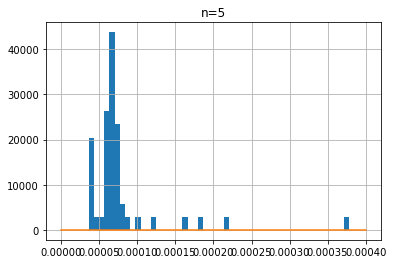

<Figure size 432x288 with 0 Axes>

In [49]:
Y=np.linspace(0, 0.0004, 1000)
mu1, sigma1 = norm.fit(x1) # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos
plt.title('n=5')
plt.hist(x1, bins = 50,  normed=1)
plt.plot(Y, datos)
plt.grid(True)
plt.show()
plt.clf()

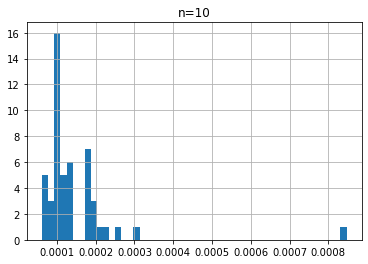

<Figure size 432x288 with 0 Axes>

In [30]:
mu2, sigma2 = norm.fit(x2) # media y desvio estandar
plt.title('n=10')
plt.hist(x2, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

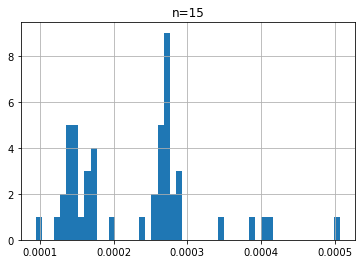

<Figure size 432x288 with 0 Axes>

In [31]:
mu3, sigma3 = norm.fit(x3) # media y desvio estandar
plt.title('n=15')
plt.hist(x3, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

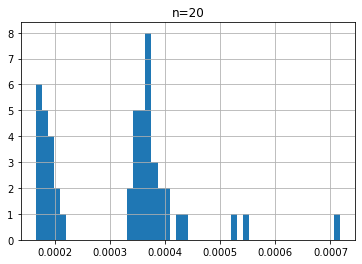

<Figure size 432x288 with 0 Axes>

In [32]:
mu4, sigma4 = norm.fit(x4) # media y desvio estandar
plt.title('n=20')
plt.hist(x4, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

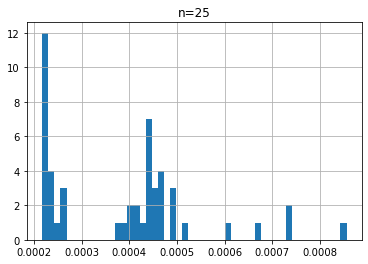

<Figure size 432x288 with 0 Axes>

In [33]:
mu5, sigma5 = norm.fit(x5) # media y desvio estandar
plt.title('n=25')
plt.hist(x5, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

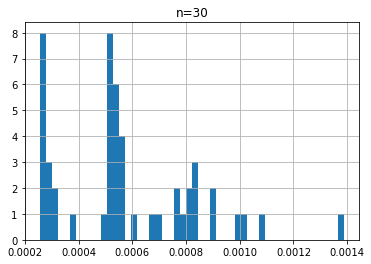

<Figure size 432x288 with 0 Axes>

In [34]:
mu6, sigma6 = norm.fit(x6) # media y desvio estandar
plt.title('n=30')
plt.hist(x6, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

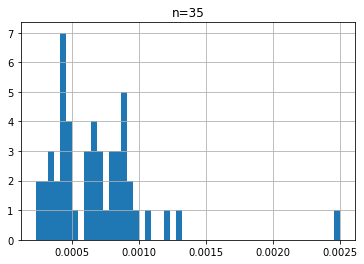

<Figure size 432x288 with 0 Axes>

In [35]:
mu7, sigma7 = norm.fit(x7) # media y desvio estandar
plt.title('n=35')
plt.hist(x7, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

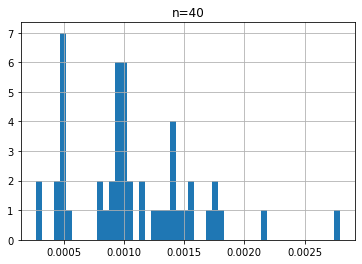

<Figure size 432x288 with 0 Axes>

In [36]:
mu8, sigma8 = norm.fit(x8) # media y desvio estandar
plt.title('n=40')
plt.hist(x8, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

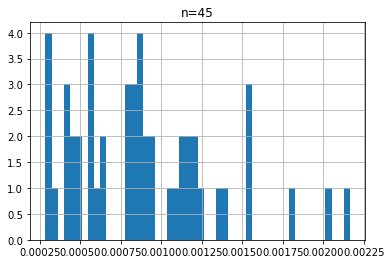

<Figure size 432x288 with 0 Axes>

In [37]:
mu9, sigma9 = norm.fit(x9) # media y desvio estandar
plt.title('n=45')
plt.hist(x9, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

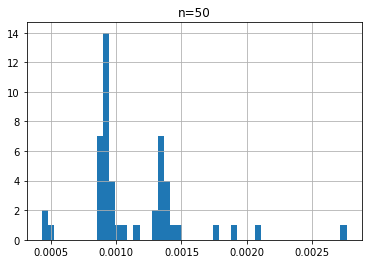

<Figure size 432x288 with 0 Axes>

In [38]:
mu10, sigma10 = norm.fit(x10) # media y desvio estandar
plt.title('n=50')
plt.hist(x10, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

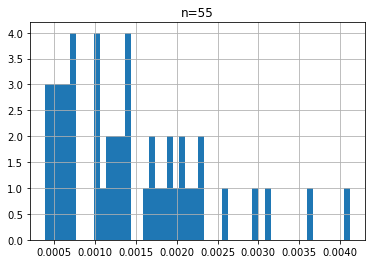

<Figure size 432x288 with 0 Axes>

In [39]:
mu11, sigma11 = norm.fit(x11) # media y desvio estandar
plt.title('n=55')
plt.hist(x11, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

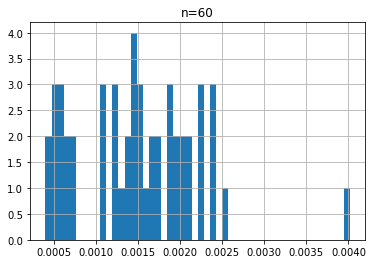

<Figure size 432x288 with 0 Axes>

In [40]:
mu12, sigma12 = norm.fit(x12) # media y desvio estandar
plt.title('n=60')
plt.hist(x12, bins = 50)
plt.grid(True)
plt.show()
plt.clf()

In [41]:
(mu, sigma) = norm.fit(x1)
print(mu, sigma)

7.825374603271485e-05 5.4152628409687154e-05


In [42]:
(mu, sigma) = norm.fit(x2)
print(mu, sigma)

0.00014519691467285156 0.00011321103318725664


In [43]:
mu, sigma = norm.fit(x2) # media y desvio estandar
datos = np.random.normal(mu, sigma, 1000) #creando muestra de datos

In [44]:
X_max=[np.max(x1), np.max(x2), np.max(x3), np.max(x4), np.max(x5), np.max(x6), np.max(x7), np.max(x8), np.max(x9), np.max(x10), np.max(x11), np.max(x12)]

In [45]:
print(X_max)

[0.00037860870361328125, 0.0008471012115478516, 0.0005071163177490234, 0.0007176399230957031, 0.0008563995361328125, 0.0013890266418457031, 0.0025043487548828125, 0.002794981002807617, 0.002162933349609375, 0.0027687549591064453, 0.0041201114654541016, 0.004015684127807617]


In [46]:
K = np.linspace(5, 60,12)

Text(0.5, 1.0, 'Máximos')

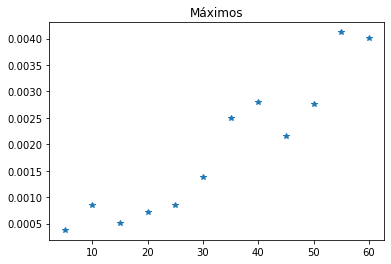

In [131]:
plt.plot(K, X_max, "*")
plt.title('Máximos')

In [128]:
def func1(x, a, b):
    return a*x+b

In [129]:
popt1, pcov1 = curve_fit(func1, K, X_max)
popt1

array([ 6.95482002e-05, -3.38424342e-04])

Text(0.5, 1.0, 'Máximos')

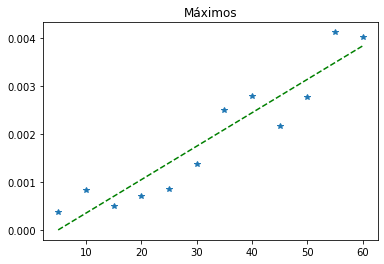

In [132]:
plt.plot(K, func1(K, *popt1), 'g--', label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.plot(K, X_max, "*")
plt.title('Máximos')

In [50]:
X_mean=[mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12]

Text(0.5, 1.0, 'Promedios')

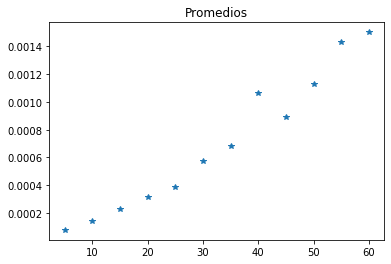

In [136]:
plt.plot(K, X_mean, "*")
plt.title('Promedios')

In [134]:
def func(x, a, b): 
    return a*x+b

In [79]:
popt, pcov = curve_fit(func, K, X_mean)

Text(0.5, 1.0, 'Promedios')

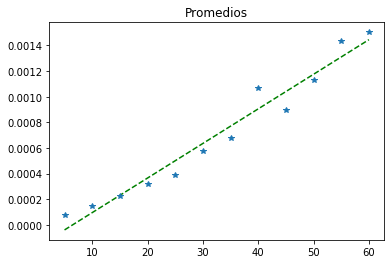

In [135]:
plt.plot(K, func(K, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot(K, X_mean, "*")
plt.title('Promedios')